Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [11]:
modeltype = 'standard'          # 'standard', 'robust', 'adversarial'
norm = 1                        # 1, 2, np.inf

if modeltype=='adversarial':
    norm = 2

Load evaluation data json file path

In [12]:
#Choose this path if you want to compare new calculated results
file_path = f'../data/paper_data/attack_comparison_{modeltype}_L{norm}.json'

with open(file_path, 'r') as f:
    data = json.load(f)

Attack types and nomenclature mapping

In [13]:
# Extracting attack types
attack_types = list(data.keys())

# Generating image indices
image_indices = list(range(len(data[attack_types[0]]['runtime'])))

# Nomenclature mapping
nomenclature_mapping = {
    'carlini_wagner_linf': 'CW',
    'carlini_wagner_l2': 'CW',
    'deep_fool': 'DeepFool',
    'elastic_net': 'ElasticNet',
    'fast_gradient_method': 'FGSM$_{minimal}$',
    'hop_skip_jump': 'HSJ',
    'newton_fool': 'NewtonFool',
    'projected_gradient_descent': 'PGD'
}

Plotting Adversarial Distance and Runtime for 20 images

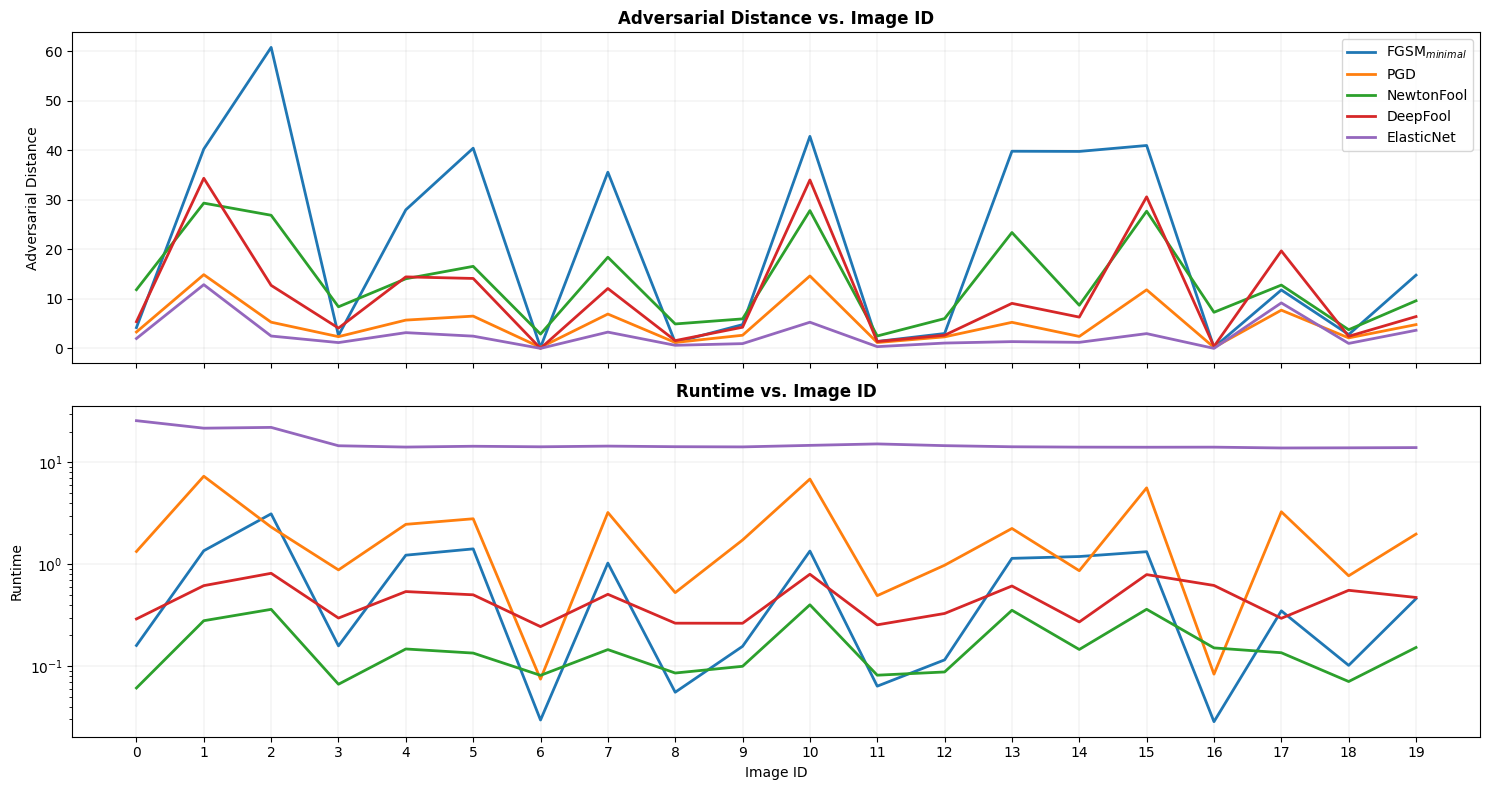

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8), sharex=True)

for i, attack_type in enumerate(attack_types):
    ax1.plot(image_indices, data[attack_type]['adversarial_distance'], label=nomenclature_mapping[attack_type], linewidth=2)
    ax2.plot(image_indices, data[attack_type]['runtime'], label=nomenclature_mapping[attack_type], linewidth=2)

# Customize the first plot (Adversarial Distance)
ax1.grid(True, which='major', linestyle='-', color='gray', linewidth=0.1)
ax1.set_axisbelow(True)
ax1.set_ylabel('Adversarial Distance')
ax1.tick_params(axis='both')
ax1.legend(loc='upper right', fontsize=10)
ax1.set_title('Adversarial Distance vs. Image ID', weight='bold')

# Customize the second plot (Runtime)
ax2.grid(True, which='major', linestyle='-', color='gray', linewidth=0.1)
ax2.set_axisbelow(True)
ax2.set_xlabel('Image ID')
ax2.set_ylabel('Runtime')
ax2.tick_params(axis='both')
ax2.set_yscale('log')
# ax2.legend(loc='upper right', fontsize=10)
ax2.set_title('Runtime vs. Image ID', weight='bold')

# Set x-ticks for both plots
ax2.set_xticks(image_indices)

# Final Layout Adjustments
plt.tight_layout()
plt.show()

Bar Plot for all the attacks representing adversarial distance and runtime of each attack

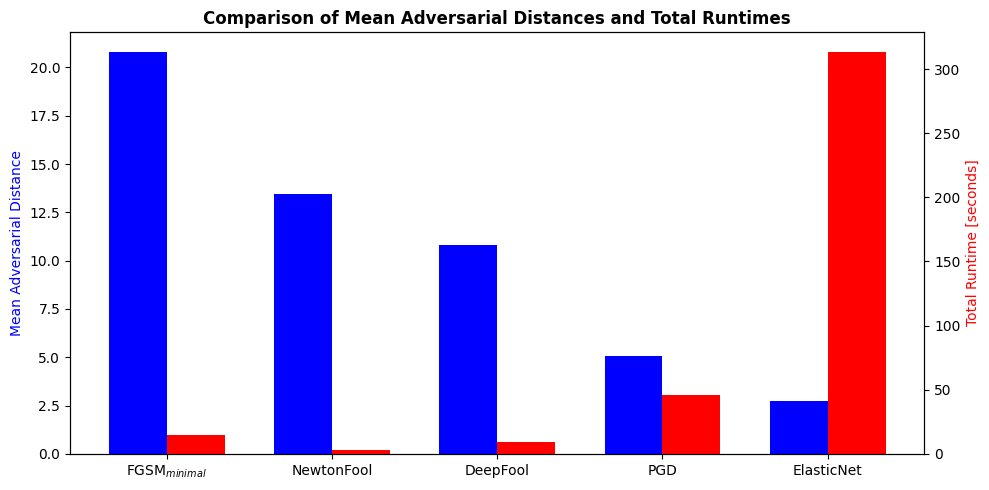

In [15]:
# Prepare data
mean_adv_distances = [np.mean(data[at]["adversarial_distance"]) for at in attack_types]
total_runtimes = [np.sum(data[at]["runtime"]) for at in attack_types]

# Create DataFrame
df = pd.DataFrame({
    'Attack Method': attack_types,
    'Mean Adv Dist': mean_adv_distances,
    'Total Runtime': total_runtimes
})

# Sort DataFrame by 'Mean Adv Dist'
df.sort_values(by='Mean Adv Dist', ascending=False, inplace=True)
df['Attack Method'] = df['Attack Method'].map(nomenclature_mapping)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 5))
ind = np.arange(len(df))  # the x locations for the groups
width = 0.35  # width of the bars

# Plot Mean Adversarial Distance
ax1.bar(ind - width/2, df['Mean Adv Dist'], width, label='Mean Adv Dist', color='blue')
ax1.set_ylabel('Mean Adversarial Distance', color='blue')
ax1.set_xticks(ind)
ax1.set_xticklabels(df['Attack Method'])
ax1.tick_params(axis='both')

# Create twin axis for runtime
ax2 = ax1.twinx()
ax2.bar(ind + width/2, df['Total Runtime'], width, label='Total Runtime', color='red')
ax2.set_ylabel('Total Runtime [seconds]', color='red')
ax2.tick_params('both')
plt.title('Comparison of Mean Adversarial Distances and Total Runtimes', weight='bold')

# Final Layout Adjustments
plt.tight_layout()
plt.show()